### Khai báo các thư viện cần thiết

In [3]:
import pandas as pd
from underthesea import ner
import ast

### Đọc vào dữ liệu

In [4]:
data = pd.read_excel(r"data_Underthesea.xlsx")

### In ra 5 dòng đầu tiên của dữ liệu

In [5]:
data.head()

,sentence,Word,NER
0,1,Ông còn nhấn_mạnh trong thư_điện_tử Phải hết_s...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,2,11 g ngày 38665 ngày kỷ_niệm bốn năm nước Mỹ b...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,3,Đi tìm tàu phải không,"['O', 'O', 'O', 'O', 'O']"
3,4,Mấy tháng gần đây tuần nào báo_chí Malaysia cũ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', '..."
4,5,Cuộc hành_trình như dài ra khi chúng_tôi không...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


### Kích thước file dữ liệu

In [6]:
data.shape

(262, 3)

### Đưa dữ liệu cột NER từ str về kiểu list

In [7]:
type(data['NER'][0])

str

In [8]:
data['NER'] = data['NER'].apply(ast.literal_eval)

In [9]:
type(data['NER'][0])

list

### data cột NER sau khi đưa về kiểu list

In [10]:
data['NER']

0      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
1      [O, O, O, O, O, O, O, O, O, B-LOC, O, O, O, O,...
2                                        [O, O, O, O, O]
3      [O, O, O, O, O, O, O, B-LOC, O, O, O, O, O, O,...
4      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
                             ...                        
257    [B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...
258                         [O, O, O, O, O, O, O, B-LOC]
259                      [O, O, B-PER, O, O, O, O, O, O]
260    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
261    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
Name: NER, Length: 262, dtype: object

### Dự đoán nhãn thực thể cho cột NER

In [11]:
NER = []
for i in range (0, len(data)):
    entities = ner(data['Word'].iloc[i])
    arr = []
    for i in range (0, len(entities)):
        arr.append(entities[i][-1])
    NER.append(arr)

In [12]:
entities

[('Vừa_rồi', 'N', 'B-NP', 'O'),
 ('cháu', 'Nc', 'B-NP', 'O'),
 ('viết', 'V', 'B-VP', 'O'),
 ('thư', 'N', 'B-NP', 'O'),
 ('cho', 'E', 'B-PP', 'O'),
 ('bà', 'Nc', 'B-NP', 'O'),
 ('nói', 'V', 'B-VP', 'O'),
 ('bác', 'Nc', 'B-NP', 'O'),
 ('ơi', 'I', 'O', 'O'),
 ('bây_giờ', 'N', 'B-NP', 'O'),
 ('gia_đình', 'V', 'B-VP', 'O'),
 ('cháu', 'Nc', 'B-NP', 'O'),
 ('bớt', 'V', 'B-VP', 'O'),
 ('khó_khăn', 'V', 'B-VP', 'O'),
 ('rồi', 'C', 'O', 'O'),
 ('cháu', 'Nc', 'B-NP', 'O'),
 ('xin', 'V', 'B-VP', 'O'),
 ('bác', 'Nc', 'B-NP', 'O'),
 ('dành', 'V', 'B-VP', 'O'),
 ('tiền', 'N', 'B-NP', 'O'),
 ('ấy', 'P', 'B-NP', 'O'),
 ('gửi', 'V', 'B-VP', 'O'),
 ('giúp', 'V', 'B-VP', 'O'),
 ('gia_đình', 'N', 'B-NP', 'O'),
 ('khác', 'A', 'B-AP', 'O'),
 ('khó_khăn', 'A', 'B-AP', 'O'),
 ('hơn', 'A', 'B-AP', 'O')]

### Đưa mảng chứa tập các nhãn thực thể của tập văn bản về dataframe

In [13]:
predNER = pd.DataFrame({'pred_NER': NER})

### In ra mảng dự đoán

In [14]:
predNER

,pred_NER
0,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[O, O, O, O, O, O, O, O, O, B-LOC, O, O, O, O,..."
2,"[O, O, O, O, O]"
3,"[O, O, O, O, O, O, O, B-LOC, O, O, O, O, O, O,..."
4,"[O, O, O, O, O, O, O, O, O, O, O, O, B-LOC, I-..."
...,...
257,"[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
258,"[O, O, O, O, O, O, O, B-LOC]"
259,"[O, O, B-PER, O, O, O, O, O, O]"
260,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


### Ghép dataframe dự đoán với dataframe gốc

In [15]:
data = pd.concat([data, predNER], axis=1)

In [16]:
data.head()

,sentence,Word,NER,pred_NER
0,1,Ông còn nhấn_mạnh trong thư_điện_tử Phải hết_s...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,2,11 g ngày 38665 ngày kỷ_niệm bốn năm nước Mỹ b...,"[O, O, O, O, O, O, O, O, O, B-LOC, O, O, O, O,...","[O, O, O, O, O, O, O, O, O, B-LOC, O, O, O, O,..."
2,3,Đi tìm tàu phải không,"[O, O, O, O, O]","[O, O, O, O, O]"
3,4,Mấy tháng gần đây tuần nào báo_chí Malaysia cũ...,"[O, O, O, O, O, O, O, B-LOC, O, O, O, O, O, O,...","[O, O, O, O, O, O, O, B-LOC, O, O, O, O, O, O,..."
4,5,Cuộc hành_trình như dài ra khi chúng_tôi không...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[O, O, O, O, O, O, O, O, O, O, O, O, B-LOC, I-..."


### In ra độ đo đánh giá mô hình

In [17]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
df = data

true_labels = [item for sublist in df['NER'].tolist() for item in sublist]
pred_labels = [item for sublist in df['pred_NER'].tolist() for item in sublist]


precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(true_labels, pred_labels)

In [18]:
accuracy, precision, recall, f1

(0.9433040078201369,
 0.9737447403991039,
 0.9433040078201369,
 0.9548575738721875)

### In ra ma trận nhầm lẫn

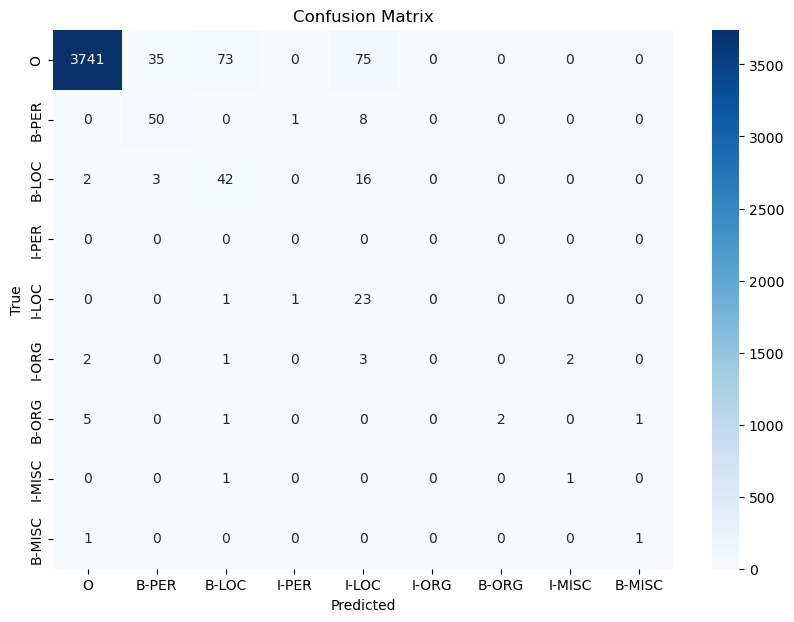

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

label = ['O', 'B-PER', 'B-LOC', 'I-PER', 'I-LOC', 'I-ORG', 'B-ORG', 'I-MISC', 'B-MISC']

cm = confusion_matrix(true_labels, pred_labels, labels=label)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


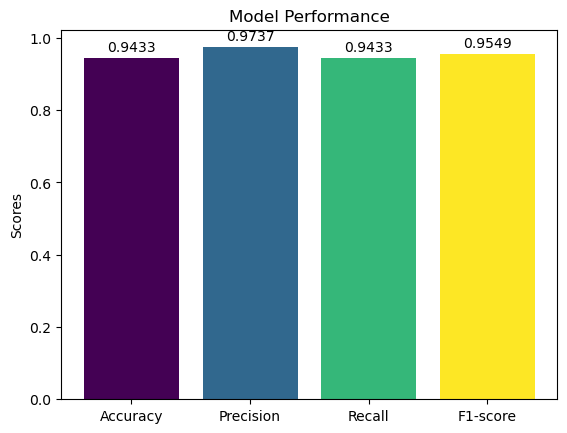

In [20]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

model_scores = [accuracy, precision, recall, f1]

colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))

x = range(len(metrics))

fig, ax = plt.subplots()
bars = ax.bar(x, model_scores, color=colors)

ax.set_ylabel('Scores')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

plt.show()